In [14]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from scipy.stats import t
import matplotlib.pyplot as plt

In [15]:
Boston = pd.read_table("Boston.csv", sep = ',')
Boston = Boston.iloc[:,1:]
print(Boston.columns)
Boston.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
data = Boston
X = data.lstat.values
X = X.reshape((len(X), 1))
y = data.medv.values
y = y.reshape((len(y), 1))

print(X.shape)

(506, 1)


In [17]:
regr = linear_model.LinearRegression() ## sklearn version
regr.fit(X, y)
print(regr.coef_, regr.intercept_)

[[-0.95004935]] [34.55384088]


In [18]:
help(linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [19]:
y_pred = regr.predict(X)
residual = y - y_pred
print(residual)

[[-5.82259510e+00]
 [-4.27038979e+00]
 [ 3.97485802e+00]
 [ 1.63930422e+00]
 [ 6.70992218e+00]
 [-9.04083746e-01]
 [ 1.55272588e-01]
 [ 1.07396042e+01]
 [ 1.03811363e+01]
 [ 5.92003070e-01]
 [-1.25331595e-01]
 [-3.04668596e+00]
 [ 2.07143447e+00]
 [-6.30643322e+00]
 [-6.60633451e+00]
 [-6.60692285e+00]
 [-5.20251613e+00]
 [-3.11661686e+00]
 [-3.24776393e+00]
 [-5.63728417e+00]
 [-9.83803463e-01]
 [-1.81465832e+00]
 [-1.56891698e+00]
 [-1.16685973e+00]
 [-3.46803641e+00]
 [-4.96852605e+00]
 [-3.88360995e+00]
 [-3.33698805e+00]
 [-3.99320915e+00]
 [-2.17224962e+00]
 [-3.82725484e-01]
 [-7.66519731e+00]
 [ 4.97202671e+00]
 [-4.02043524e+00]
 [-1.72983702e+00]
 [-6.45736314e+00]
 [-3.71377775e+00]
 [-5.22190805e+00]
 [-2.29840926e-01]
 [ 3.50372329e-01]
 [ 2.22725684e+00]
 [-3.35560201e+00]
 [-3.73405413e+00]
 [-2.78547369e+00]
 [-4.28086955e+00]
 [-5.55383698e+00]
 [-1.11064252e+00]
 [-9.29130287e-02]
 [ 9.11717971e+00]
 [ 2.36958651e-01]
 [-2.07567707e+00]
 [-5.09487547e+00]
 [-4.5375802

In [20]:
def anovat3(yi, yihat): ## Anova table defined
    n = len(yi)
    ybar = sum(yi)/n

    ssr = sum((yihat - ybar)**2)
    sse = sum((yi - yihat)**2)
    ssto = sum((yi - ybar)**2)
    correct = n * ybar**2
    unc = sum(yi**2)
    
    msr = ssr
    mse = sse/(n-2)
    
    Source = ['Reg', 'Res', 'Total', 'Correction for mean', 'Total, uncorrected']
    SS = [ssr, sse, ssto, correct, unc]
    DF = [1, n-2, n-1, 1, n] # Because we are doing univariate regression here
                       # I set the first DF as 1 defaultly. 
    MS = [msr, mse, 'NULL', 'NULL', 'NULL']
    
    data = {'Source': Source, 'SS': SS, 'DF': DF, 'MS': MS}
    table = pd.DataFrame(data, columns = ['Source', 'SS', 'DF', 'MS'])
    
    return table

In [21]:
print(anovat3(y, y_pred))

                Source                    SS   DF                    MS
0                  Reg  [23243.913996693307]    1  [23243.913996693307]
1                  Res  [19472.381418326444]  504  [38.635677417314376]
2                Total   [42716.29541501979]  505                  NULL
3  Correction for mean  [256910.04458498085]    1                  NULL
4   Total, uncorrected   [299626.3399999999]  506                  NULL


In [22]:
def tvalue(yi, xi, yihat, beta):
    n = len(yi)
    xbar = sum(xi) / n
    var_y = sum((yi-yihat)**2) / (n-2)
    var = var_y / sum((xi-xbar)**2)
    
    tval = beta / var**0.5
    return tval[0][0]

In [23]:
tval = tvalue(y, X, y_pred, regr.coef_)
print(tval)

-24.527899851187733


In [24]:
def pvalue(tval, ndf):
    pval = 2 * (1-t.cdf(abs(tval), ndf))
    return pval  # p-value

In [25]:
ndf = len(y) - 2
pval = pvalue(tval, ndf)
print(pval)

0.0


In [26]:
est = ols(formula = 'medv ~  lstat', data = data).fit() ## stats version, easier
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        16:45:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

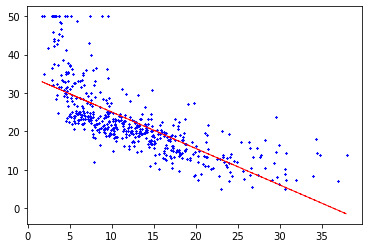

In [27]:
plt.scatter(X, y, s = 2, color = 'blue', marker = 'x')
plt.plot(X, y_pred, color = 'red', lw = 1, ls = 'dashed')
plt.show()

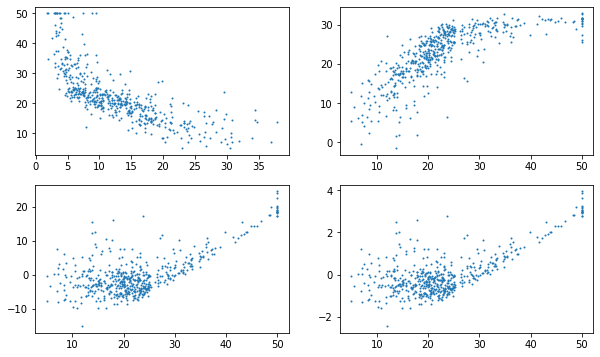

In [28]:
plt.figure(figsize = (10,6))
plt.subplot(221)
plt.scatter(X, y, s = 1)
plt.subplot(222)
plt.scatter(y, est.predict(), s = 1)
plt.subplot(223)
plt.scatter(y, est.resid, s = 1)
plt.subplot(224)
plt.scatter(y, est.resid_pearson, s = 1)
plt.show()

In [29]:
#diagn = OLSInfluence(est).summary_frame()
#print(diagn.head())


In [30]:
np.argmax(OLSInfluence(est).hat_diag_factor)

374

## Multiple Linear Regression

In [31]:
est = ols(formula = 'medv ~  lstat+age', data = data).fit() ## stats version, easier
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.98e-88
Time:                        16:45:44   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [32]:
def form(data, y, remove = []):
    x = data.columns.tolist()
    x = set(x)-set(remove)
    x = list(x - set([y]))
    ind = x[0]
    for i in x[1:]:
        ind += '+' + i
        
    f = y+' ~ '+ind
    return f

In [33]:
data = Boston
formula = form(data, y = 'medv') ## construct the regression formula
print(formula)

medv ~ black+dis+ptratio+zn+age+crim+tax+chas+rad+lstat+rm+indus+nox


In [34]:
est = ols(formula = formula, data = data).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        16:45:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

$VIF(\hat\beta_j)=\frac{1}{1-R^2_{X_j|X_{-j}}}$. The higher value, the higher colinearity exists for particular independent variable. 

In [37]:
vif = pd.DataFrame()
XX = data.iloc[:,:-1]
vif["VIF Factor"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif["features"] = XX.columns
print(vif) 

    VIF Factor features
0     2.100373     crim
1     2.844013       zn
2    14.485758    indus
3     1.152952     chas
4    73.894947      nox
5    77.948283       rm
6    21.386850      age
7    14.699652      dis
8    15.167725      rad
9    61.227274      tax
10   85.029547  ptratio
11   20.104943    black
12   11.102025    lstat


In [38]:
formula = form(data, y = 'medv', remove = ['age']) ## remove variable 'age' from the regression
est = ols(formula = formula, data = data).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          6.08e-136
Time:                        16:50:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.0

## 3.6.4 Interaction Terms

In [39]:
est = ols(formula = 'medv ~ lstat*age', data = data).fit() ## stats version, easier
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           4.86e-88
Time:                        16:50:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Nonlinear Transformation of the Predictors

In [40]:
est = ols(formula = 'medv ~ lstat + I(lstat**2)', data = data).fit() ## stats version, easier
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.56e-112
Time:                        16:50:22   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [41]:
table = sm.stats.anova_lm(est, typ = 3) ## type2 type3 ANOVA table
print(table)

                     sum_sq     df            F         PR(>F)
Intercept      73703.883673    1.0  2415.616479  3.500749e-194
lstat          10833.300262    1.0   355.057255   2.548861e-60
I(lstat ** 2)   4125.138260    1.0   135.199822   7.630116e-28
Residual       15347.243158  503.0          NaN            NaN


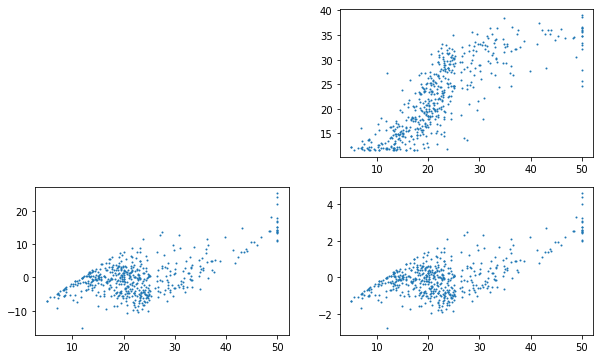

In [42]:
y = Boston.medv
plt.figure(figsize = (10,6))

plt.subplot(222)
plt.scatter(y, est.predict(), s = 1)
plt.subplot(223)
plt.scatter(y, est.resid, s = 1)
plt.subplot(224)
plt.scatter(y, est.resid_pearson, s = 1)
plt.show()

In [44]:
def poly(y, x, p):
    f = y
    f += ' ~ '
    for i in range(1,p+1):
        f += 'np.power(' + x + ',' + str(i) + ')'
        if i != p:
            f += '+'
    print(f)        
    return f


In [45]:
est = ols(formula = poly('medv', 'lstat', 5), data = data).fit()
print(est.summary())  ## result different from R

medv ~ np.power(lstat,1)+np.power(lstat,2)+np.power(lstat,3)+np.power(lstat,4)+np.power(lstat,5)
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          8.73e-122
Time:                        16:51:26   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [46]:
est = ols(formula = 'medv ~ np.log(rm)', data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.22e-64
Time:                        16:51:27   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

## 3.6.6 Qualitative Predictors

In [47]:
Carseats = pd.read_table("Carseats.csv", sep = ',')
Carseats = Carseats.iloc[:,1:]
print(Carseats.columns)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [48]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [38]:
data = Carseats
f = form(data, y = 'Sales') + '+Income:Advertising' + '+Price:Age'
est = ols(formula = f, data = data).fit()
print(est.summary())
help(est.summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          6.14e-166
Time:                        16:50:56   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

In [39]:
def contrast(variable):
    level = list(set(variable))
    n = len(level)
    df = pd.DataFrame(np.zeros([n,n]), index = level, columns = level)
    for i in range(n):
        for j in range(n):
            df.iloc[i,j] = 1 if i==j else 0
    
    return df

In [40]:

print(list(set(Carseats.ShelveLoc)))
print(len(list(set(Carseats.ShelveLoc))))
print(contrast(Carseats.ShelveLoc))

['Bad', 'Medium', 'Good']
3
        Bad  Medium  Good
Bad     1.0     0.0   0.0
Medium  0.0     1.0   0.0
Good    0.0     0.0   1.0



## 3.6.7 Writing Functions

In [ ]:
importfuncs()

In [ ]:
def importfuncs():
    import statsmodels
    import scipy
    print("Modules Imported.")

In [ ]:
importfuncs()